In [1]:
from sentinelhub import SHConfig

INSTANCE_ID = '8de24891-406e-4269-82ee-a8f53cb343f2'  # In case you put instance ID into configuration file you can leave this unchanged


if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import datetime
import numpy as np

import matplotlib.pyplot as plt

In [4]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

In [5]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [6]:
from sentinelhub import CustomUrlParam

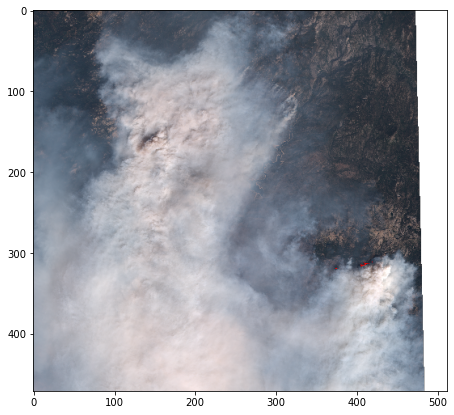

In [7]:
# Tip: if you want to insert the coordinates from google, you will need to set
# the first two coordinates for the upper left corner (-122.41, 39.31)
# and second two (-122.75, 39.55) will refer to lower right corner of the box
# Lastly: lat long from Google maps needs to be switched around (e.g. for lower corner 
# google maps will give you '39.55, -122.75'; you need to switch out around to read -122.75, 39.55)

betsiboka_coords_wgs84 = [-119.56, 37.49, -119.12, 37.15]
betsiboka_bbox2 = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)

burned_area_url = 'https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/burned_area_ms/script.js'

evalscripturl_wms_request = WmsRequest(layer='TRUE-COLOR-S2-L1C', # Layer parameter can be any existing layer
                                       bbox=betsiboka_bbox2,
                                       time='2020-09-08',
                                       width=512,
                                       config = config,
                                       custom_url_params={CustomUrlParam.EVALSCRIPTURL: burned_area_url})

evalscripturl_wms_data = evalscripturl_wms_request.get_data()
plot_image(evalscripturl_wms_data[1])


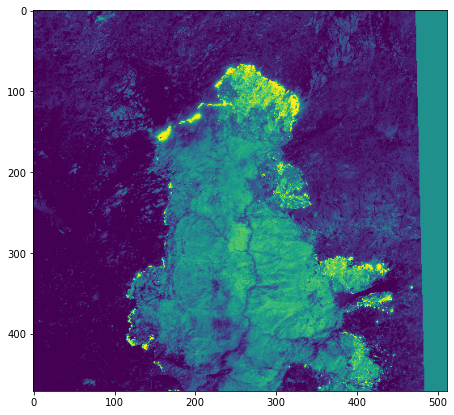

In [8]:
#Fire Boundary Script 
fire_boundary_url = 'https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/fire_boundary/script.js'

evalscripturl_wms_request = WmsRequest(layer='TRUE-COLOR-S2-L1C', # Layer parameter can be any existing layer
                                       bbox=betsiboka_bbox2,
                                       time='2020-09-08',
                                       width=512,
                                       config = config,
                                       custom_url_params={CustomUrlParam.EVALSCRIPTURL: fire_boundary_url})

evalscripturl_wms_data = evalscripturl_wms_request.get_data()
plot_image(evalscripturl_wms_data[1])

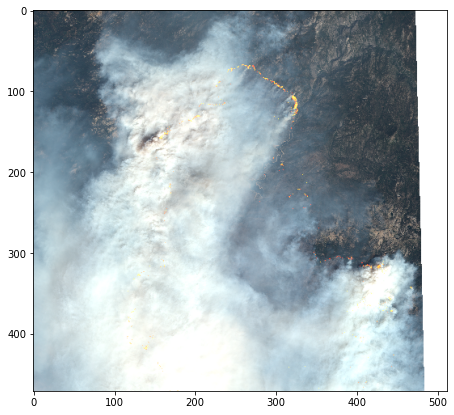

In [9]:
active_fire_detection_url = 'https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/markuse_fire/script.js'

evalscripturl_wms_request = WmsRequest(layer='TRUE-COLOR-S2-L1C', # Layer parameter can be any existing layer
                                       bbox=betsiboka_bbox2,
                                       time='2020-09-08',
                                       width=512,
                                       config = config,
                                       custom_url_params={CustomUrlParam.EVALSCRIPTURL: active_fire_detection_url})

evalscripturl_wms_data = evalscripturl_wms_request.get_data()
plot_image(evalscripturl_wms_data[1])
